# Analyze naturally occurring mutations at sites of strong escape
This Python Jupyter notebook sees how many naturally occuring mutations are observed at each site of strong escape

## Set up analysis
Import Python modules:

In [1]:
import math
import os

import dms_variants.utils

from IPython.display import display, HTML

import matplotlib.pyplot as plt

import pandas as pd

from plotnine import *

import yaml

Read the configuration file:

In [2]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

Read escape profiles config, which tells which sets to make plots for:

In [3]:
with open(config['escape_profiles_config']) as f:
    escape_profiles_config = yaml.safe_load(f)

Create output directory:

In [4]:
os.makedirs(config['gisaid_mutations_dir'], exist_ok=True)

Read counts of naturally ocurring mutations:

In [5]:
print(f"Reading mutation counts from {config['gisaid_mutation_counts']}")

mut_counts = pd.read_csv(config['gisaid_mutation_counts'])

Reading mutation counts from results/GISAID_mutations/mutation_counts.csv


Read sites of "strong escape" from all antibodies / sera:

In [6]:
print(f"Reading sites of strong escape from {config['strong_escape_sites']}")

strong_sites = pd.read_csv(config['strong_escape_sites'])

Reading sites of strong escape from results/escape_profiles/strong_escape_sites.csv


Read escape fractions for all antibodies / sera:

In [7]:
print(f"Reading escape fractions from {config['escape_fracs']}")

escape_fracs = (
    pd.read_csv(config['escape_fracs'])
    .query('library == "average"')
    .drop(columns='site')
    .rename(columns={'mutation': 'mutant',
                     'label_site': 'site'})
    [['condition', 'site', 'wildtype', 'mutant', config['mut_metric'], config['site_metric']]]
    )

escape_fracs

Reading escape fractions from results/escape_scores/escape_fracs.csv


,condition,site,wildtype,mutant,mut_escape_frac_epistasis_model,site_total_escape_frac_epistasis_model
0,12C_d152_80,331,N,A,0.003458,0.05785
1,12C_d152_80,331,N,D,0.004238,0.05785
2,12C_d152_80,331,N,E,0.003425,0.05785
3,12C_d152_80,331,N,F,0.003613,0.05785
4,12C_d152_80,331,N,G,0.003608,0.05785
...,...,...,...,...,...,...
150287,mAb-2E06_400,531,T,R,0.000721,0.01184
150288,mAb-2E06_400,531,T,S,0.000798,0.01184
150289,mAb-2E06_400,531,T,V,0.000528,0.01184
150290,mAb-2E06_400,531,T,W,0.000419,0.01184


## Counts of mutations at sites of escape
Get counts of naturally occurring mutations at sites of escape, along with the actual escape values:

First get mutation-level counts:

In [8]:
mutcounts_strong_sites = (
    strong_sites[['condition', 'threshold', 'site']]
    .merge(mut_counts, how='inner', on='site')
    .merge(escape_fracs[['condition', 'site', 'wildtype', config['site_metric']]].drop_duplicates(),
           on=['condition', 'site', 'wildtype'],
           validate='many_to_one')
    .assign(mutation=lambda x: x['wildtype'] + x['site'].astype(str) + x['mutant'])
    .sort_values('count', ascending=False)
    )

Now get site-level counts (aggregating all mutations at a site):

In [9]:
sitecounts_strong_sites = (
    mutcounts_strong_sites
    .assign(mut_count=lambda x: x['mutation'] + ' (' + x['count'].astype(str) + ')')
    .groupby(['condition', 'threshold', 'site', 'wildtype', config['site_metric']])
    .aggregate({'count': 'sum', 'mut_count': ', '.join})
    .rename(columns={'mut_count': 'counts_by_mutation'})
    .reset_index()
    .sort_values('count', ascending=False)
    )

print(f"Here are first few lines showing the most frequently mutated sites of escape:")
display(HTML(sitecounts_strong_sites.head(n=20).to_html(index=False)))

Here are first few lines showing the most frequently mutated sites of escape:


condition,threshold,site,wildtype,site_total_escape_frac_epistasis_model,count,counts_by_mutation
S2E12_56,sensitive_max_mut,477,S,1.3660,13973,"S477N (13801), S477I (140), S477R (27), S477G (3), S477T (2)"
25_d18_500,sensitive,439,N,0.5356,3301,N439K (3301)
REGN10987_400,sensitive_max_mut,439,N,2.2040,3301,N439K (3301)
25_d18_500,sensitive_max_mut,439,N,0.5356,3301,N439K (3301)
REGN10987_400,sensitive,439,N,2.2040,3301,N439K (3301)
REGN10987_400,default,439,N,2.2040,3301,N439K (3301)
25C_d115_80,sensitive_max_mut,501,N,0.7936,1446,"N501Y (1409), N501T (32), N501S (5)"
25_d18_500,sensitive,501,N,0.5866,1446,"N501Y (1409), N501T (32), N501S (5)"
COV-021_500,sensitive_max_mut,501,N,0.3682,1446,"N501Y (1409), N501T (32), N501S (5)"
25C_d115_80,sensitive,501,N,0.7936,1446,"N501Y (1409), N501T (32), N501S (5)"


## Plot sites of escape with natural variation
We perform analyses on all subsets in the escape profiles config for which this is specified:


Analyzing natural mutations for 2196_2130_forAZ
Writing counts of mutations at sites of strong escape to results/GISAID_mutations/2196_2130_forAZ_mutation_counts.csv. First few lines:


condition,threshold,site,wildtype,count,counts_by_mutation
COV2-2130,default,494,S,140,"S494P (125), S494L (10), S494A (5)"
COV2-2130,default,446,G,50,"G446V (39), G446S (8), G446A (2), G446D (1)"
COV2-2196,default,476,G,43,"G476S (39), G476A (3), G476F (1)"
COV2-2130,default,444,K,34,"K444R (27), K444N (7)"
COV2-2130,default,346,R,30,"R346K (16), R346S (9), R346T (3), R346I (2)"
COV2-2196,default,475,A,30,"A475V (29), A475S (1)"
COV2-2196,default,486,F,24,"F486L (23), F486I (1)"
COV2-2130,default,450,N,10,"N450K (7), N450D (3)"
COV2-2130,default,445,V,9,"V445A (5), V445F (2), V445I (2)"
COV2-2130,default,448,N,3,"N448K (2), N448D (1)"


Plotting which antibodies / sera are escaped by mutations at all sites of escape with at least 5 mutation counts and saving to results/GISAID_mutations/2196_2130_forAZ_mutation_counts.pdf.


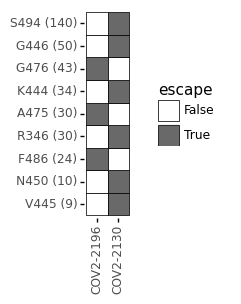


Analyzing natural mutations for human_sera
Writing counts of mutations at sites of strong escape to results/GISAID_mutations/human_sera_mutation_counts.csv. First few lines:


condition,threshold,site,wildtype,count,counts_by_mutation
12C_d152,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
24C_d32,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484G (2), E484R (2), E484V (1)"
1C_d26,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
25C_d48,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
25C_d115,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
22C_d104,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
23C_d26,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
24C_d104,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
22C_d28,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
23_d21,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"


Plotting which antibodies / sera are escaped by mutations at all sites of escape with at least 5 mutation counts and saving to results/GISAID_mutations/human_sera_mutation_counts.pdf.


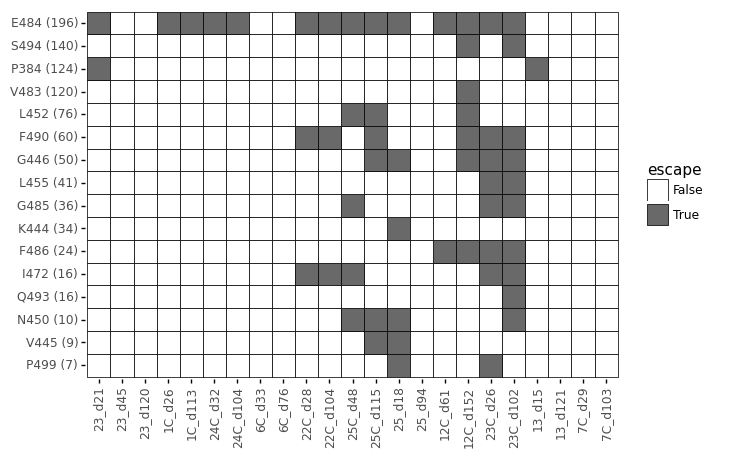


Analyzing natural mutations for EZ_7A
Writing counts of mutations at sites of strong escape to results/GISAID_mutations/EZ_7A_mutation_counts.csv. First few lines:


condition,threshold,site,wildtype,count,counts_by_mutation
EZ-7A,default,459,S,40,"S459Y (35), S459F (5)"
EZ-7A,default,352,A,32,"A352S (26), A352V (5), A352D (1)"
EZ-7A,default,427,D,32,"D427G (14), D427V (8), D427Y (6), D427N (2), D427A (1), D427H (1)"
EZ-7A,default,468,I,24,"I468V (10), I468T (9), I468F (3), I468L (2)"
EZ-7A,default,516,E,15,"E516Q (13), E516G (1), E516V (1)"
EZ-7A,default,514,S,9,"S514F (8), S514Y (1)"
EZ-7A,default,357,R,8,R357K (8)
EZ-7A,default,462,K,6,"K462T (5), K462N (1)"
EZ-7A,default,466,R,2,"R466I (1), R466K (1)"
EZ-7A,default,465,E,1,E465D (1)


Plotting which antibodies / sera are escaped by mutations at all sites of escape with at least 5 mutation counts and saving to results/GISAID_mutations/EZ_7A_mutation_counts.pdf.


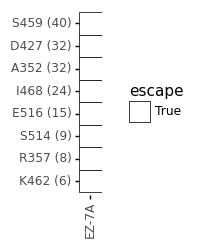


Analyzing natural mutations for Bjorkman_antibodies
Writing counts of mutations at sites of strong escape to results/GISAID_mutations/Bjorkman_antibodies_mutation_counts.csv. First few lines:


condition,threshold,site,wildtype,count,counts_by_mutation
C105,default,453,Y,743,Y453F (743)
C144,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
C002,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
C121,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
C110,default,494,S,140,"S494P (125), S494L (10), S494A (5)"
C002,default,483,V,120,"V483A (57), V483F (55), V483L (5), V483I (3)"
C105,default,417,K,98,"K417N (97), K417R (1)"
C002,default,452,L,76,"L452R (45), L452M (27), L452Q (3), L452P (1)"
C110,default,452,L,76,"L452R (45), L452M (27), L452Q (3), L452P (1)"
C121,default,490,F,60,"F490S (44), F490L (14), F490V (2)"


Plotting which antibodies / sera are escaped by mutations at all sites of escape with at least 5 mutation counts and saving to results/GISAID_mutations/Bjorkman_antibodies_mutation_counts.pdf.


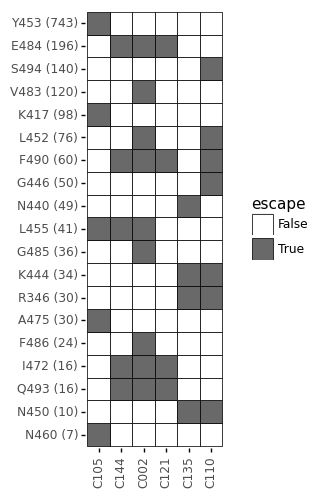


Analyzing natural mutations for Bjorkman_C144
Writing counts of mutations at sites of strong escape to results/GISAID_mutations/Bjorkman_C144_mutation_counts.csv. First few lines:


condition,threshold,site,wildtype,count,counts_by_mutation
C144,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
C144,default,490,F,60,"F490S (44), F490L (14), F490V (2)"
C144,default,455,L,41,L455F (41)
C144,default,493,Q,16,"Q493L (12), Q493K (2), Q493H (1), Q493R (1)"
C144,default,472,I,16,"I472V (8), I472L (6), I472N (1), I472T (1)"
C144,default,456,F,2,F456L (2)
C144,default,489,Y,2,Y489H (2)


Plotting which antibodies / sera are escaped by mutations at all sites of escape with at least 5 mutation counts and saving to results/GISAID_mutations/Bjorkman_C144_mutation_counts.pdf.


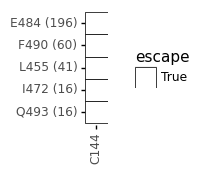


Analyzing natural mutations for Nussenzweig_serum
Writing counts of mutations at sites of strong escape to results/GISAID_mutations/Nussenzweig_serum_mutation_counts.csv. First few lines:


condition,threshold,site,wildtype,count,counts_by_mutation
COV-021,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484G (2), E484R (2), E484V (1)"
COV-057,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
COV-072,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
COV-047,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
COV-057,default,490,F,60,"F490S (44), F490L (14), F490V (2)"
COV-047,default,490,F,60,"F490S (44), F490L (14), F490V (2)"
COV-047,default,455,L,41,L455F (41)
COV-021,default,455,L,41,L455F (41)
COV-047,default,485,G,36,"G485R (32), G485S (2), G485V (1), G485T (1)"
COV-021,default,486,F,24,"F486L (23), F486I (1)"


Plotting which antibodies / sera are escaped by mutations at all sites of escape with at least 5 mutation counts and saving to results/GISAID_mutations/Nussenzweig_serum_mutation_counts.pdf.


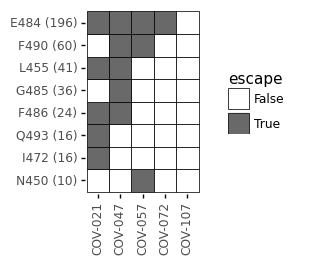


Analyzing natural mutations for Weisblum_selection_paper
Writing counts of mutations at sites of strong escape to results/GISAID_mutations/Weisblum_selection_paper_mutation_counts.csv. First few lines:


condition,threshold,site,wildtype,count,counts_by_mutation
C144,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
COV-072,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
C121,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
COV-047,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
C121,default,490,F,60,"F490S (44), F490L (14), F490V (2)"
C144,default,490,F,60,"F490S (44), F490L (14), F490V (2)"
COV-047,default,490,F,60,"F490S (44), F490L (14), F490V (2)"
C135,default,440,N,49,"N440K (37), N440Y (8), N440D (2), N440S (1), N440T (1)"
COV-047,default,455,L,41,L455F (41)
C144,default,455,L,41,L455F (41)


Plotting which antibodies / sera are escaped by mutations at all sites of escape with at least 5 mutation counts and saving to results/GISAID_mutations/Weisblum_selection_paper_mutation_counts.pdf.


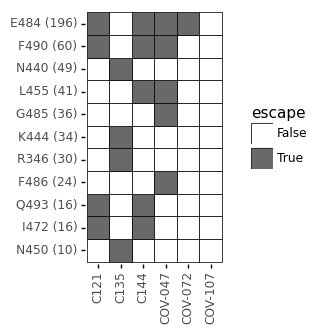


Analyzing natural mutations for IPD_ligand
Writing counts of mutations at sites of strong escape to results/GISAID_mutations/IPD_ligand_mutation_counts.csv. First few lines:


condition,threshold,site,wildtype,count,counts_by_mutation
LCB1,default,453,Y,743,Y453F (743)
LCB1,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
LCB1,default,417,K,98,"K417N (97), K417R (1)"
LCB1,default,455,L,41,L455F (41)
LCB1,default,475,A,30,"A475V (29), A475S (1)"
LCB1,default,403,R,13,"R403K (12), R403S (1)"
LCB1,default,503,V,9,"V503F (6), V503I (2), V503L (1)"
LCB1,default,456,F,2,F456L (2)


Plotting which antibodies / sera are escaped by mutations at all sites of escape with at least 5 mutation counts and saving to results/GISAID_mutations/IPD_ligand_mutation_counts.pdf.


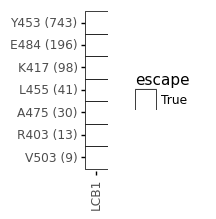


Analyzing natural mutations for vir_antibodies
Writing counts of mutations at sites of strong escape to results/GISAID_mutations/vir_antibodies_mutation_counts.csv. First few lines:


condition,threshold,site,wildtype,count,counts_by_mutation
S2M11,default,453,Y,743,Y453F (743)
S2X58,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
S2M11,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
S2X16,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484G (2), E484R (2), E484V (1)"
S2H58,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
S2D106,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
S2X58,default,494,S,140,"S494P (125), S494L (10), S494A (5)"
S2M11,default,494,S,140,"S494P (125), S494L (10), S494A (5)"
S304,default,384,P,124,"P384L (84), P384S (27), P384R (13)"
S2X259,default,384,P,124,"P384L (84), P384S (27), P384R (13)"


Plotting which antibodies / sera are escaped by mutations at all sites of escape with at least 5 mutation counts and saving to results/GISAID_mutations/vir_antibodies_mutation_counts.pdf.


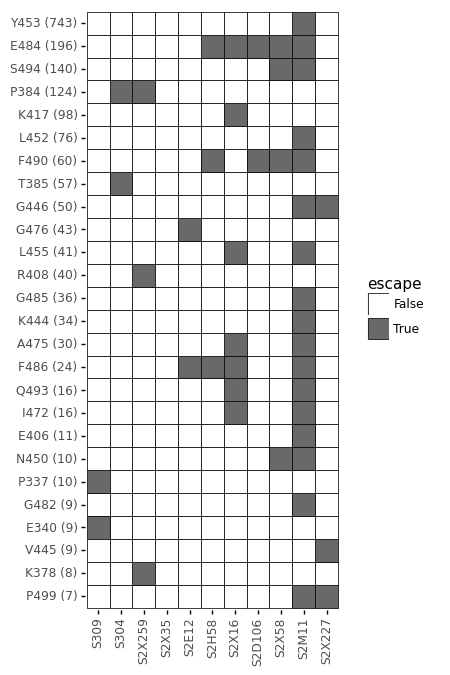


Analyzing natural mutations for vir_antibodies_single_nt
Writing counts of mutations at sites of strong escape to results/GISAID_mutations/vir_antibodies_single_nt_mutation_counts.csv. First few lines:


condition,threshold,site,wildtype,count,counts_by_mutation
S2M11,default,453,Y,743,Y453F (743)
S2X58,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
S2M11,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
S2X16,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484G (2), E484R (2), E484V (1)"
S2H58,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
S2D106,default,484,E,196,"E484K (142), E484Q (38), E484A (8), E484D (3), E484R (2), E484G (2), E484V (1)"
S2X58,default,494,S,140,"S494P (125), S494L (10), S494A (5)"
S2M11,default,494,S,140,"S494P (125), S494L (10), S494A (5)"
S2X259,default,384,P,124,"P384L (84), P384S (27), P384R (13)"
S2X16,default,417,K,98,"K417N (97), K417R (1)"


Plotting which antibodies / sera are escaped by mutations at all sites of escape with at least 5 mutation counts and saving to results/GISAID_mutations/vir_antibodies_single_nt_mutation_counts.pdf.


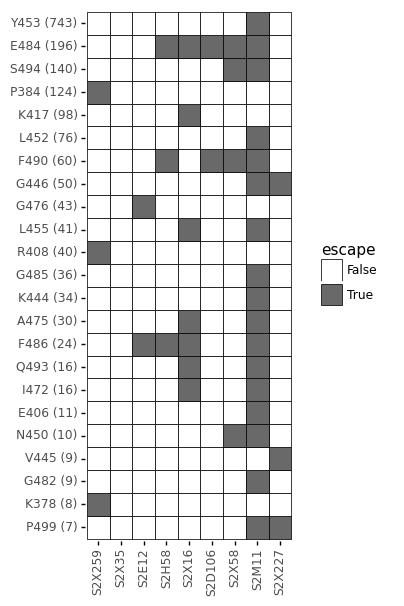

In [10]:
for name, specs in escape_profiles_config.items():
    if 'analyze_natural_mutations' not in specs or not specs['analyze_natural_mutations']:
        continue
    print(f"\nAnalyzing natural mutations for {name}")
    
    conditions = specs['conditions']
    
    threshold = specs['plot_auto_identified_sites']
    if threshold not in sitecounts_strong_sites['threshold'].unique():
        raise ValueError(f"invalid threshold {threshold} for {name}")
    
    # get count for conditions of interest for this subset
    df = (sitecounts_strong_sites
          .query('condition in @conditions')
          .query('threshold == @threshold')
          .assign(condition=lambda x: x['condition'].map(conditions))
          .drop(columns=config['site_metric'])
          )
    countsfile = os.path.join(config['gisaid_mutations_dir'], f"{name}_mutation_counts.csv")
    print(f"Writing counts of mutations at sites of strong escape to {countsfile}. First few lines:")
    display(HTML(df.head(n=10).to_html(index=False)))
    df.to_csv(countsfile, index=False)
    
    # make plot showing escape sites with more than mincounts mutations
    if 'natural_mutations_mincounts' in specs:
        mincounts = specs['natural_mutations_mincounts']
    else:
        mincounts = 5
    plotsfile = os.path.join(config['gisaid_mutations_dir'], f"{name}_mutation_counts.pdf")
    print('Plotting which antibodies / sera are escaped by mutations at all sites of '
          f"escape with at least {mincounts} mutation counts and saving to {plotsfile}.")
    plot_df = (
        # data frame with all combinations of conditions and sites
        pd.DataFrame.from_records([(condition, site) for condition in conditions.values()
                                   for site in df['site'].unique()],
                                  columns=['condition', 'site'])
        # annotate sites of escape
        .merge(df.assign(escape=lambda x: x['count'] >= mincounts)[['condition', 'site', 'escape']],
               how='left',
               validate='one_to_one',
               on=['condition', 'site'])
        .assign(escape=lambda x: x['escape'].fillna(False))
        # add wildtype and counts of mutations at each site
        .merge(sitecounts_strong_sites[['site', 'wildtype', 'count']].drop_duplicates(),
               how='left',
               validate='many_to_one',
               on='site')
        # get only sites with sufficient mutation counts
        .query('count > @mincounts')
        # only get sites where at least one antibody escapes
        .assign(n_escape=lambda x: x.groupby('site')['escape'].transform('sum'))
        .query('n_escape > 0')
        # order conditions, and order sites by count after making nice label
        .assign(site_label=lambda x: x['wildtype'] + x['site'].astype(str) + ' (' + x['count'].astype(str) + ')')
        .sort_values('count')
        .assign(condition=lambda x: pd.Categorical(x['condition'], list(conditions.values()), ordered=True),
                site_label=lambda x: pd.Categorical(x['site_label'], x['site_label'].unique(), ordered=True)
                )
        )
    p = (ggplot(plot_df) +
         aes('condition', 'site_label', fill='escape') +
         geom_tile(color='black', size=0.3) +
         theme(axis_text_x=element_text(angle=90),
               figure_size=(0.3 * plot_df['condition'].nunique(), 0.3 * plot_df['site_label'].nunique()),
               panel_background=element_blank(),
               ) +
         xlab('') +
         ylab('') +
         scale_fill_manual(values=['white', 'dimgray'])
         )
    p.save(plotsfile, verbose=False)
    fig = p.draw()
    display(fig)
    plt.close(fig)

## Plot correlation between escape and natural frequency
First aggregate frequency of mutations and escape fractions:

In [11]:
escape_and_freq = (
    escape_fracs
    .rename(columns={config['mut_metric']: 'mut_escape',
                     config['site_metric']: 'tot_site_escape'})
    .assign(max_site_escape=lambda x: x.groupby(['condition', 'site'])['mut_escape'].transform('max'),
            mean_site_escape=lambda x: x.groupby(['condition', 'site'])['mut_escape'].transform('mean'))
    .merge(mut_counts[['site', 'wildtype', 'mutant', 'frequency']]
                     .rename(columns={'frequency': 'mut_freq'}),
           on=['site', 'wildtype', 'mutant'],
           how='left', validate='many_to_one')
    .assign(mut_freq=lambda x: x['mut_freq'].fillna(0),
            site_freq=lambda x: x.groupby(['condition', 'site'])['mut_freq'].transform('sum'),
            mutation=lambda x: x['wildtype'] + x['site'].astype(str) + x['mutant'],
            )
    )

display(HTML(escape_and_freq.head().to_html()))

,condition,site,wildtype,mutant,mut_escape,tot_site_escape,max_site_escape,mean_site_escape,mut_freq,site_freq,mutation
0,12C_d152_80,331,N,A,0.003458,0.05785,0.00558,0.003616,0.0,0.0,N331A
1,12C_d152_80,331,N,D,0.004238,0.05785,0.00558,0.003616,0.0,0.0,N331D
2,12C_d152_80,331,N,E,0.003425,0.05785,0.00558,0.003616,0.0,0.0,N331E
3,12C_d152_80,331,N,F,0.003613,0.05785,0.00558,0.003616,0.0,0.0,N331F
4,12C_d152_80,331,N,G,0.003608,0.05785,0.00558,0.003616,0.0,0.0,N331G


Now make plots.
Note that you can configure below exactly what variables you want to plot (mutation frequency, mutation escape, site escape, etc):


Analyzing natural mutations for 2196_2130_forAZ
Plotting each condition and saving to results/GISAID_mutations/2196_2130_forAZ_escape_vs_freq_by-condition.pdf


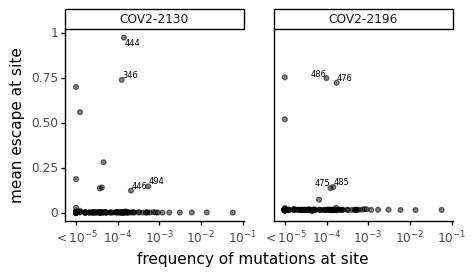

Plotting average across conditions and saving to results/GISAID_mutations/2196_2130_forAZ_escape_vs_freq_average.pdf


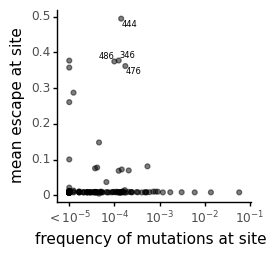


Analyzing natural mutations for human_sera
Plotting each condition and saving to results/GISAID_mutations/human_sera_escape_vs_freq_by-condition.pdf


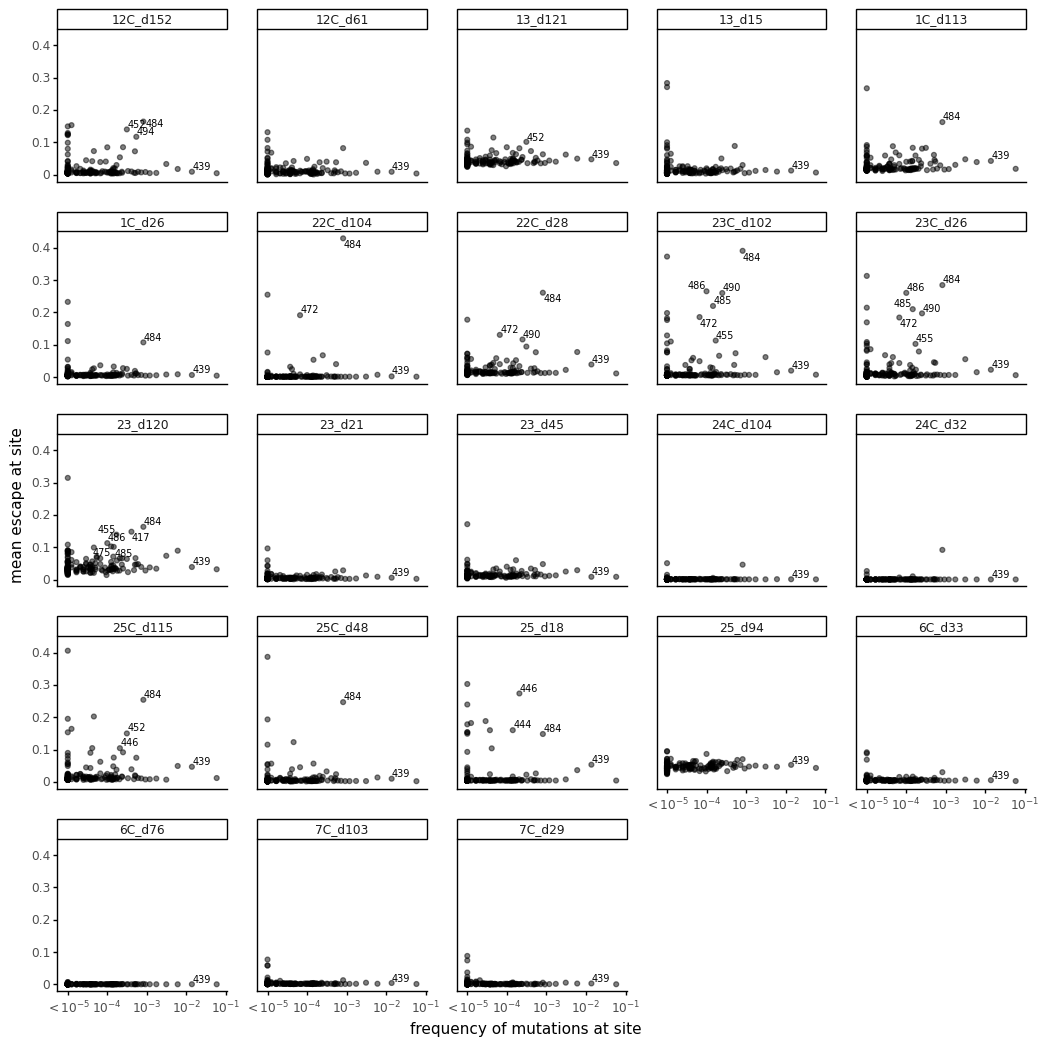

Plotting average across conditions and saving to results/GISAID_mutations/human_sera_escape_vs_freq_average.pdf


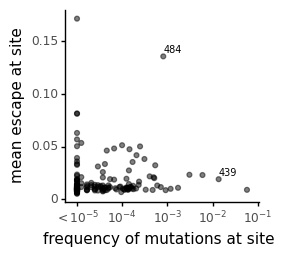


Analyzing natural mutations for EZ_7A
Plotting each condition and saving to results/GISAID_mutations/EZ_7A_escape_vs_freq_by-condition.pdf


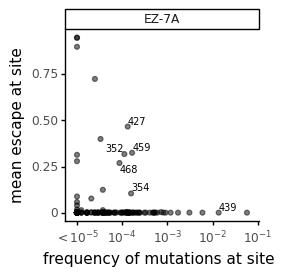

Plotting average across conditions and saving to results/GISAID_mutations/EZ_7A_escape_vs_freq_average.pdf


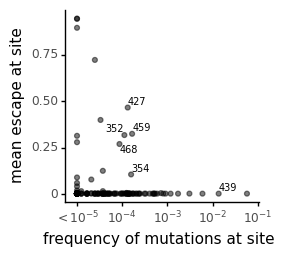


Analyzing natural mutations for Bjorkman_antibodies
Plotting each condition and saving to results/GISAID_mutations/Bjorkman_antibodies_escape_vs_freq_by-condition.pdf


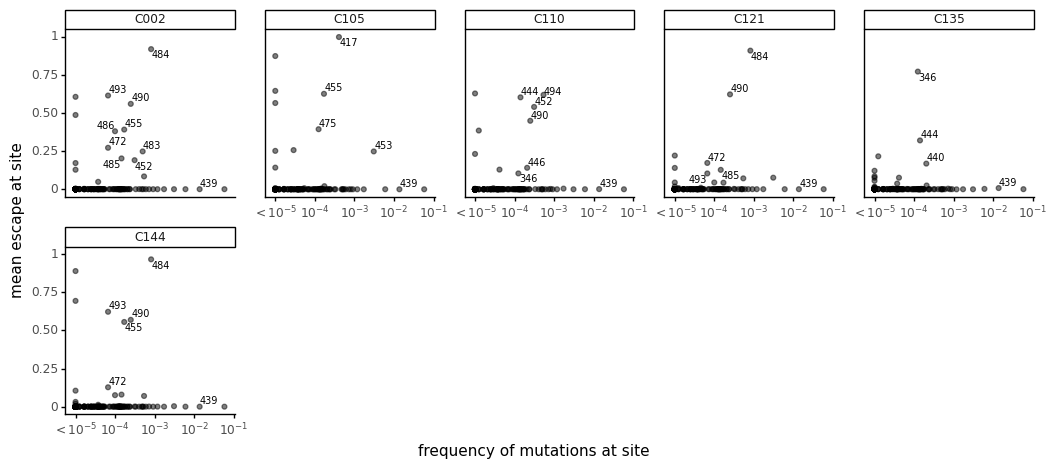

Plotting average across conditions and saving to results/GISAID_mutations/Bjorkman_antibodies_escape_vs_freq_average.pdf


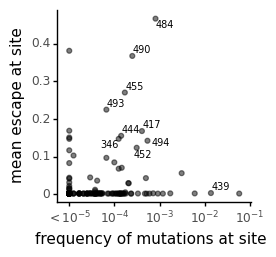


Analyzing natural mutations for Bjorkman_C144
Plotting each condition and saving to results/GISAID_mutations/Bjorkman_C144_escape_vs_freq_by-condition.pdf


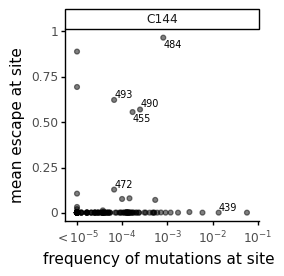

Plotting average across conditions and saving to results/GISAID_mutations/Bjorkman_C144_escape_vs_freq_average.pdf


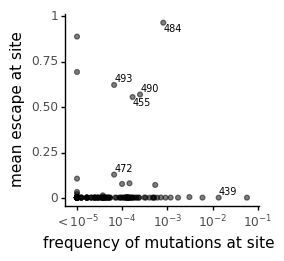


Analyzing natural mutations for Nussenzweig_serum
Plotting each condition and saving to results/GISAID_mutations/Nussenzweig_serum_escape_vs_freq_by-condition.pdf


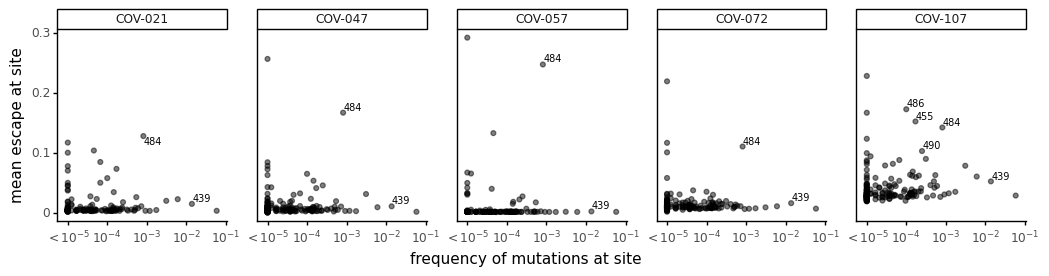

Plotting average across conditions and saving to results/GISAID_mutations/Nussenzweig_serum_escape_vs_freq_average.pdf


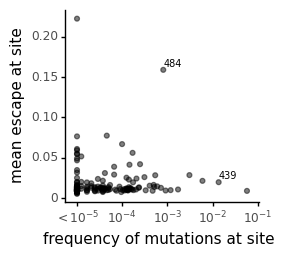


Analyzing natural mutations for Weisblum_selection_paper
Plotting each condition and saving to results/GISAID_mutations/Weisblum_selection_paper_escape_vs_freq_by-condition.pdf


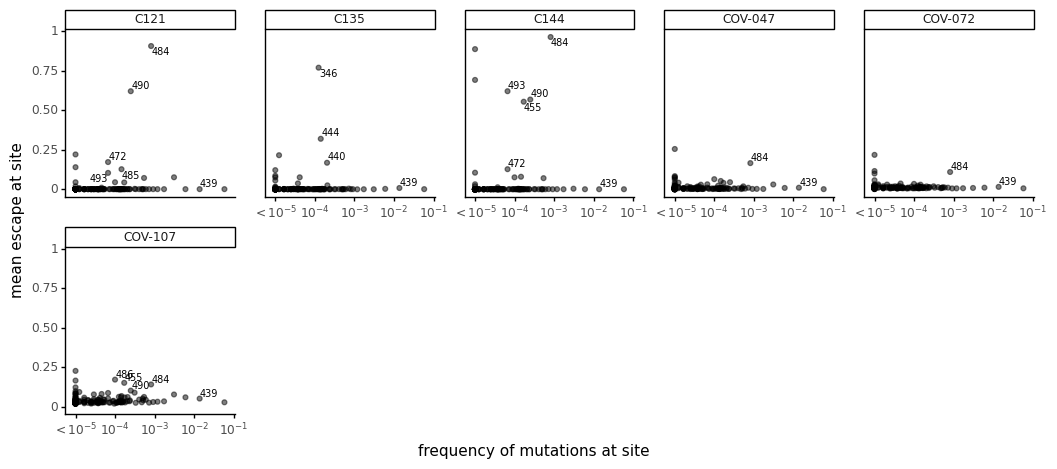

Plotting average across conditions and saving to results/GISAID_mutations/Weisblum_selection_paper_escape_vs_freq_average.pdf


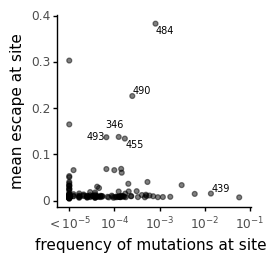


Analyzing natural mutations for IPD_ligand
Plotting each condition and saving to results/GISAID_mutations/IPD_ligand_escape_vs_freq_by-condition.pdf


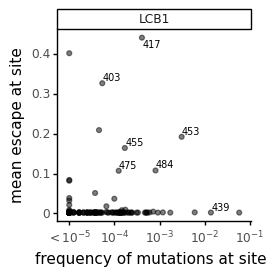

Plotting average across conditions and saving to results/GISAID_mutations/IPD_ligand_escape_vs_freq_average.pdf


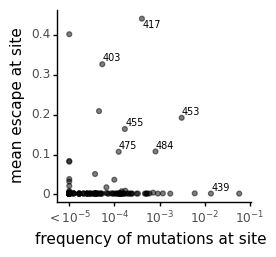


Analyzing natural mutations for vir_antibodies
Plotting each condition and saving to results/GISAID_mutations/vir_antibodies_escape_vs_freq_by-condition.pdf


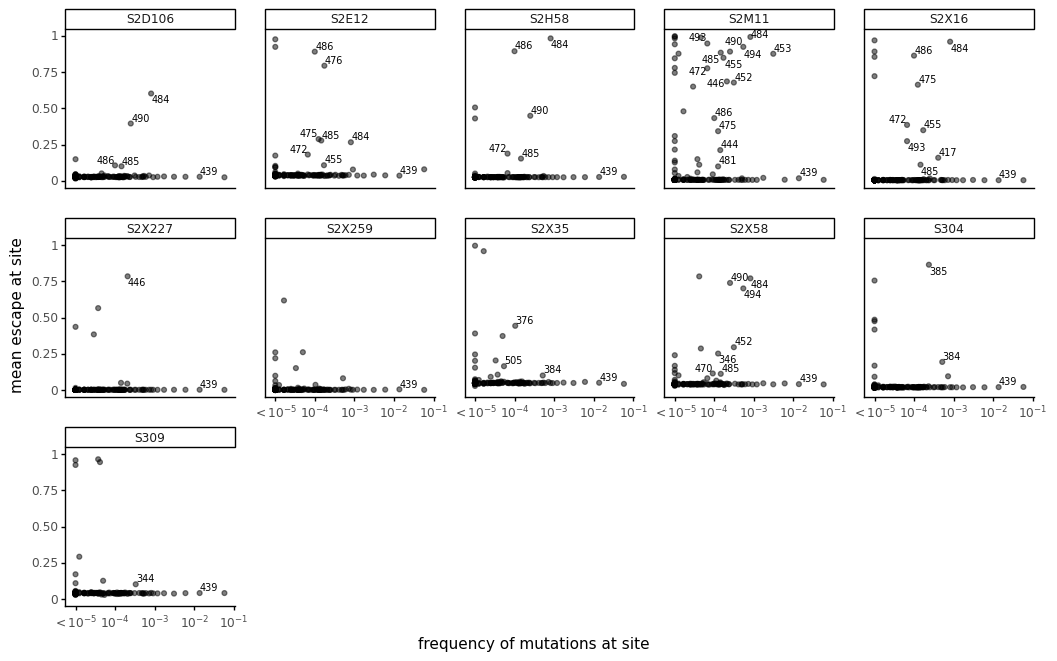

Plotting average across conditions and saving to results/GISAID_mutations/vir_antibodies_escape_vs_freq_average.pdf


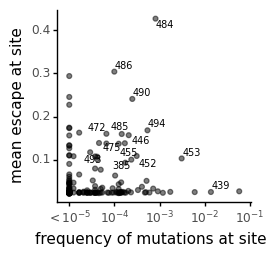


Analyzing natural mutations for vir_antibodies_single_nt
Plotting each condition and saving to results/GISAID_mutations/vir_antibodies_single_nt_escape_vs_freq_by-condition.pdf


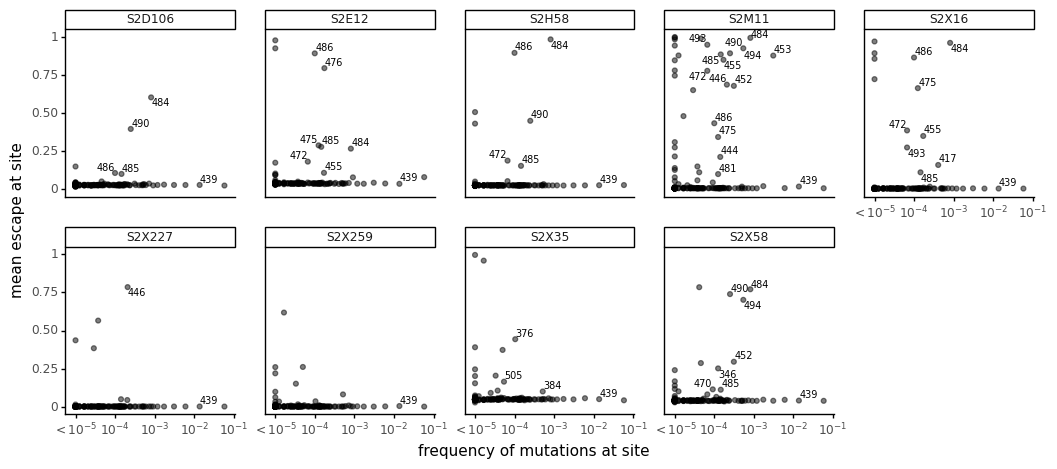

Plotting average across conditions and saving to results/GISAID_mutations/vir_antibodies_single_nt_escape_vs_freq_average.pdf


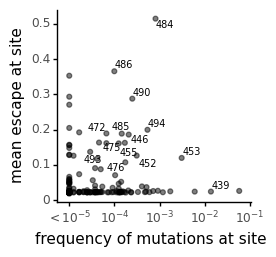

In [12]:
# all the parameters below have the indicated defaults, but can be set in `escape_profiles_config`
# via analyze_natural_mutations_specs
analysis_specs = {
    'maxcol': 5,  # maximum columns in plot
    'minfreq': 1e-5,  # collapse any natural frequencies < this
    'freq': 'site_freq',  # type of frequency to plot: mut_freq or site_freq
    'escape': 'mean_site_escape',  # type of escape to plot: mean_site_escape, mut_escape, max_site_escape, tot_site_escape
    'xlabel': 'frequency of mutations at site',
    'ylabel': 'mean escape at site',
    'label_minfreq': 5e-5,  # label points with frequency >= this and...
    'label_minescape': 0.1,  # label points with escape >= this
    'also_label': [],  # also label any points (sites or mutations) listed here
    'label_font_size': 6,  # font size for labeling poins
    }
label_minfreq = 5e-5  # label points with frequency >= this
label_minescape = 0.05  # label points with escape >= this

for name, specs in escape_profiles_config.items():
    if 'analyze_natural_mutations' not in specs or not specs['analyze_natural_mutations']:
        continue
    print(f"\nAnalyzing natural mutations for {name}")
    
    if 'analyze_natural_mutations_specs' in specs:
        for key, val in specs['analyze_natural_mutations_specs'].items():
            analysis_specs[key] = val
    
    conditions = specs['conditions']
    
    if 'site' in analysis_specs['freq'] and 'site' in analysis_specs['escape']:
        ptlabel = 'site'
    else:
        ptlabel = 'mutation'
    
    df = (escape_and_freq
          .query('condition in @conditions')
          .assign(condition=lambda x: x['condition'].map(conditions))
          .assign(**{analysis_specs['freq']: lambda x: x[analysis_specs['freq']].clip(lower=analysis_specs['minfreq'])})
          [['condition', analysis_specs['escape'], analysis_specs['freq'], ptlabel]]
          .drop_duplicates()
          )

    assert len(conditions) == df['condition'].nunique()
    
    for avg_conditions in (False, True):
        
        if avg_conditions:
            plot_df = df.groupby(ptlabel, as_index=False).aggregate({analysis_specs['freq']: 'mean',
                                                                     analysis_specs['escape']: 'mean'})
            nrow = ncol = 1
            plotfile = os.path.join(config['gisaid_mutations_dir'],
                                    f"{name}_escape_vs_freq_average.pdf")
            print(f"Plotting average across conditions and saving to {plotfile}")
        else:
            nrow = math.ceil(len(conditions) / analysis_specs['maxcol'])
            ncol = min(len(conditions), analysis_specs['maxcol'])
            plot_df = df
            plotfile = os.path.join(config['gisaid_mutations_dir'],
                                    f"{name}_escape_vs_freq_by-condition.pdf")
            print(f"Plotting each condition and saving to {plotfile}")
            
        label_df = (plot_df
                    .assign(label=lambda x: x[ptlabel].isin(analysis_specs['also_label']))
                    .query(f"label or ({analysis_specs['freq']} >= {analysis_specs['label_minfreq']})")
                    .query(f"label or ({analysis_specs['escape']} >= {analysis_specs['label_minescape']})")
                    )
        
        maxfreq = plot_df[analysis_specs['freq']].max()
        assert analysis_specs['minfreq'] == 10**(int(math.log10(analysis_specs['minfreq'])))
        logxbreaks = list(range(int(math.log10(analysis_specs['minfreq'])), round(math.log10(maxfreq)) + 1, 1))
        xbreaks = [10**logx for logx in logxbreaks]
        xlabels = [f"$10^{{{logx}}}$" for logx in logxbreaks]
        xlabels[0] = f"$<{xlabels[0][1:]}"
        
        p = (ggplot(plot_df) +
             aes(analysis_specs['freq'], analysis_specs['escape']) +
             geom_point(alpha=0.5) +
             geom_text(data=label_df,
                       mapping=aes(label=ptlabel),
                       size=analysis_specs['label_font_size'],
                       adjust_text={'expand_points': (1.05, 1.2),
                                    'expand_text': (1.05, 1.2)},
                       ) +
             theme_classic() +
             theme(figure_size=(2.5 * ncol, 2.5 * nrow),
                   panel_spacing=0.3,
                   ) +
             scale_x_log10(name=analysis_specs['xlabel'],
                           breaks=xbreaks,
                           labels=xlabels,
                           expand=(0.07, 0)) +
             ylab(analysis_specs['ylabel'])
             )
        if not avg_conditions:
            p = p + facet_wrap('~ condition', ncol=ncol)
        p.save(plotfile, verbose=False)
        fig = p.draw()
        display(fig)
        plt.close(fig)
        